<a href="https://colab.research.google.com/github/RockhoRockho/Deep_Learning_Tensorflow/blob/main/_4_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EB%8B%A4%EC%96%91%ED%95%9C_%ED%95%99%EC%8A%B5_%EA%B8%B0%EC%88%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_seq(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.

  return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17473536/17464789 [==============================] - 0s 0us/step


#### 2가지의 모델 설정

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model_1 = Sequential([Dense(16, activation='relu', input_shape=(10000, ), name='input'),
                      Dense(16, activation='relu', name='hidden'),
                      Dense(1, activation='sigmoid', name='output')])

In [4]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_2 = Sequential([Dense(7, activation='relu', input_shape=(10000, ), name='input2'),
                      Dense(7, activation='relu', name='hidden2'),
                      Dense(1, activation='sigmoid', name='output2')])

In [6]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 7)                 70007     
                                                                 
 hidden2 (Dense)             (None, 7)                 56        
                                                                 
 output2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_1.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

model_2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

#### 2개의 모델 학습

In [8]:
model_1_hist = model_1.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 44ms/step - loss: 0.4691 - acc: 0.8227 - val_loss: 0.3466 - val_acc: 0.8773
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2660 - acc: 0.9087 - val_loss: 0.2886 - val_acc: 0.8892
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2034 - acc: 0.9272 - val_loss: 0.2802 - val_acc: 0.8889
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1700 - acc: 0.9386 - val_loss: 0.2947 - val_acc: 0.8825
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1441 - acc: 0.9510 - val_loss: 0.3531 - val_acc: 0.8643
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1234 - acc: 0.9584 - val_loss: 0.3284 - val_acc: 0.8770
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1089 - acc: 0.9635 - val_loss: 0.3617 - val_acc: 0.8710
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.0964 - a

In [9]:
model_2_hist = model_2.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 41ms/step - loss: 0.5335 - acc: 0.8167 - val_loss: 0.4251 - val_acc: 0.8712
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3394 - acc: 0.8962 - val_loss: 0.3258 - val_acc: 0.8850
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2543 - acc: 0.9163 - val_loss: 0.2885 - val_acc: 0.8898
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2094 - acc: 0.9288 - val_loss: 0.2771 - val_acc: 0.8906
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1806 - acc: 0.9382 - val_loss: 0.3102 - val_acc: 0.8738
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1605 - acc: 0.9458 - val_loss: 0.2851 - val_acc: 0.8865
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1446 - acc: 0.9510 - val_loss: 0.2961 - val_acc: 0.8830
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1308 - a

#### 비교

In [10]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

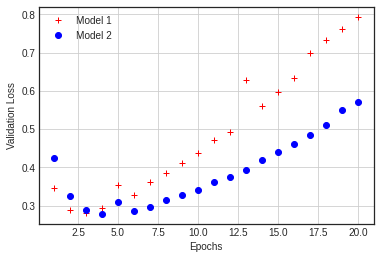

In [12]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [13]:
model_3 = Sequential([Dense(1024, activation='relu', input_shape=(10000, ), name='input3'),
                      Dense(1024, activation='relu', name='hidden3'),
                      Dense(1, activation='sigmoid', name='output3')])

model_3.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 1024)              10241024  
                                                                 
 hidden3 (Dense)             (None, 1024)              1049600   
                                                                 
 output3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [14]:
model_3_hist = model_3.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 47ms/step - loss: 0.5184 - acc: 0.7878 - val_loss: 0.3118 - val_acc: 0.8698
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2186 - acc: 0.9133 - val_loss: 0.2789 - val_acc: 0.8898
Epoch 3/20
49/49 [==============================] - 1s 21ms/step - loss: 0.1105 - acc: 0.9598 - val_loss: 0.3795 - val_acc: 0.8834
Epoch 4/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0566 - acc: 0.9832 - val_loss: 0.5307 - val_acc: 0.8713
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1284 - acc: 0.9854 - val_loss: 0.4012 - val_acc: 0.8728
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.0018 - acc: 0.9999 - val_loss: 0.6080 - val_acc: 0.8839
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1275 - acc: 0.9846 - val_loss: 0.5322 - val_acc: 0.8814
Epoch 8/20
49/49 [==============================] - 1s 22ms/step - loss: 3.5943e-04

#### 시각화

In [15]:
model_3_val_loss = model_3_hist.history['val_loss']

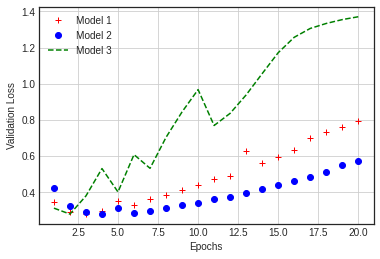

In [16]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label='Model 3')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

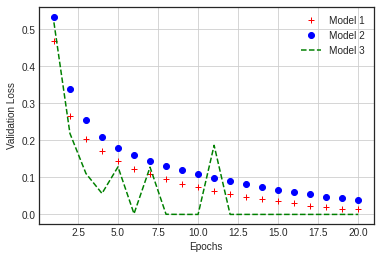

In [17]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']

plt.plot(epochs, model_1_train_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label='Model 3')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [18]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential([Dense(30, kernel_initializer='he_normal', input_shape=[10, 10]),
                    LeakyReLU(alpha=0.2),
                    Dense(1, kernel_initializer='he_normal'),
                    Activation('softmax')])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10, 30)            330       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 30)            0         
                                                                 
 dense_1 (Dense)             (None, 10, 1)             31        
                                                                 
 activation (Activation)     (None, 10, 1)             0         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [21]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [22]:
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [23]:
from tensorflow.keras.optimizers import Adagrad

In [24]:
optimizer = Adagrad(learning_rate=0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [25]:
from tensorflow.keras.optimizers import RMSprop

In [26]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [29]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


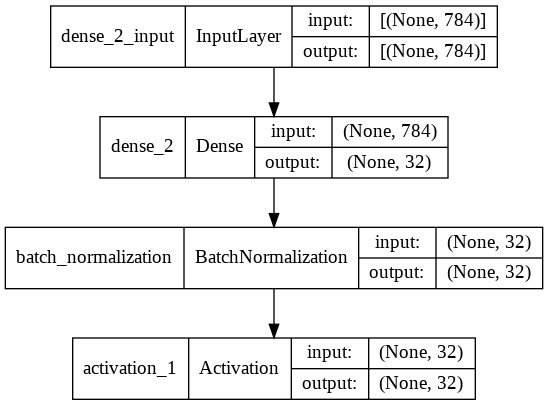

In [30]:
model = Sequential()

model.add(Dense(32, input_shape=(28*28, ), kernel_initializer='he_normal'))
model.add(BatchNormalization()) # 정규화시킴
model.add(Activation('relu'))

model.summary()

plot_model(model, show_shapes=True)

### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [31]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

#### 모델 구성

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


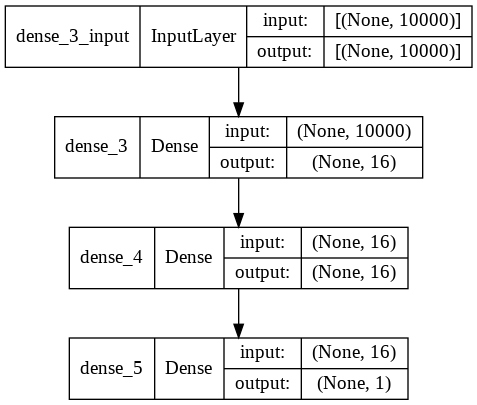

In [32]:
l2_model = Sequential([Dense(16, kernel_regularizer=l2(0.001), activation='relu', input_shape=(10000, )),
                       Dense(16, kernel_regularizer=l2(0.001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model.summary()
plot_model(l2_model, show_shapes=True)

#### 모델 학습

In [33]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 41ms/step - loss: 0.5165 - acc: 0.8179 - val_loss: 0.4040 - val_acc: 0.8719
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3283 - acc: 0.9030 - val_loss: 0.3428 - val_acc: 0.8854
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2775 - acc: 0.9172 - val_loss: 0.3303 - val_acc: 0.8891
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2535 - acc: 0.9284 - val_loss: 0.3330 - val_acc: 0.8883
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2425 - acc: 0.9303 - val_loss: 0.3380 - val_acc: 0.8865
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2331 - acc: 0.9354 - val_loss: 0.3908 - val_acc: 0.8640
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2275 - acc: 0.9389 - val_loss: 0.3492 - val_acc: 0.8824
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2209 - a

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

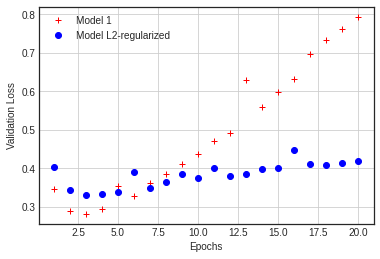

In [34]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### L1과 비교

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


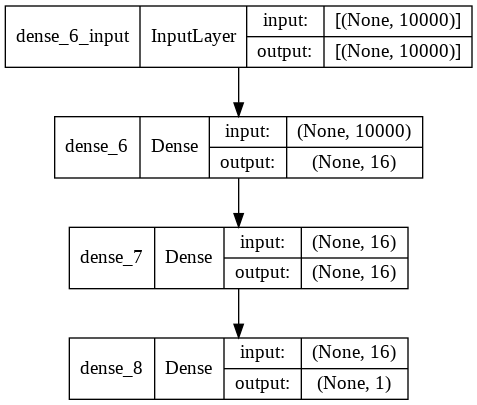

In [35]:
l1_model = Sequential([Dense(16, kernel_regularizer=l1(0.001), activation='relu', input_shape=(10000, )),
                       Dense(16, kernel_regularizer=l1(0.001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_model.summary()
plot_model(l1_model, show_shapes=True)

In [36]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 40ms/step - loss: 0.9136 - acc: 0.7859 - val_loss: 0.6585 - val_acc: 0.8306
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.6106 - acc: 0.8532 - val_loss: 0.5867 - val_acc: 0.8605
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.5680 - acc: 0.8649 - val_loss: 0.5672 - val_acc: 0.8595
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.5447 - acc: 0.8691 - val_loss: 0.5465 - val_acc: 0.8686
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.5310 - acc: 0.8711 - val_loss: 0.5419 - val_acc: 0.8638
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.5186 - acc: 0.8736 - val_loss: 0.5233 - val_acc: 0.8724
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.5081 - acc: 0.8786 - val_loss: 0.5206 - val_acc: 0.8700
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.5048 - a

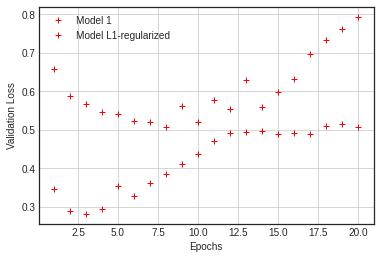

In [37]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'r+', label='Model L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

3가지 모델 비교
- Original
- L1
- L2

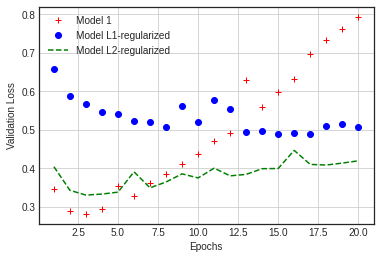

In [38]:
epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-regularized')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### L1, L2와 비교

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                160016    
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


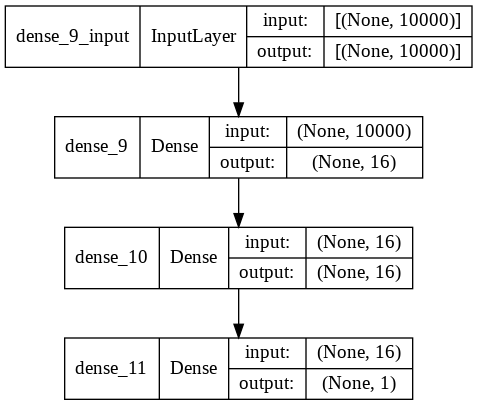

In [39]:
l1_l2_model = Sequential([Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001),
                                activation='relu', input_shape=(10000, )),
                       Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001),
                             activation='relu'),
                       Dense(1, activation='sigmoid')])

l1_l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_l2_model.summary()
plot_model(l1_l2_model, show_shapes=True)

In [40]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 36ms/step - loss: 0.5829 - acc: 0.8081 - val_loss: 0.4408 - val_acc: 0.8805
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3883 - acc: 0.8916 - val_loss: 0.4059 - val_acc: 0.8698
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3425 - acc: 0.9031 - val_loss: 0.3694 - val_acc: 0.8858
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3233 - acc: 0.9100 - val_loss: 0.3603 - val_acc: 0.8884
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3121 - acc: 0.9144 - val_loss: 0.3656 - val_acc: 0.8847
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3072 - acc: 0.9162 - val_loss: 0.3746 - val_acc: 0.8827
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3002 - acc: 0.9182 - val_loss: 0.3683 - val_acc: 0.8860
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2934 - a

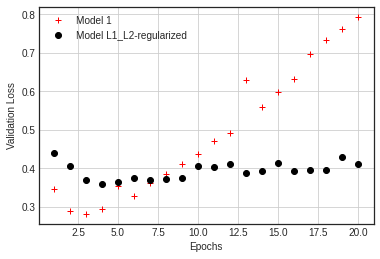

In [41]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

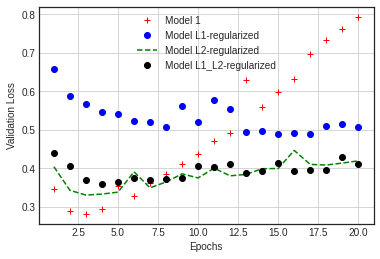

In [42]:
epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model L1-regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label='Model L2-regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label='Model L1_L2-regularized')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [43]:
from tensorflow.keras.layers import Dropout

#### 모델 구성

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


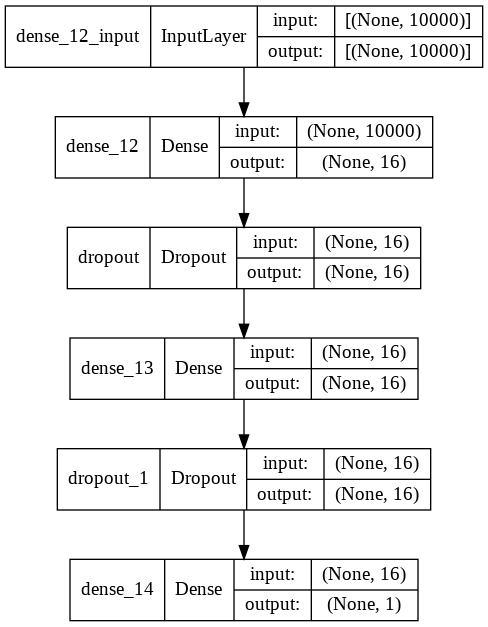

In [44]:
dropout_model = Sequential([Dense(16, activation='relu', input_shape=(10000, )),
                            Dropout(0.5),
                            Dense(16, activation='relu'),
                            Dropout(0.5),
                            Dense(1, activation='sigmoid')])

dropout_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

dropout_model.summary()
plot_model(dropout_model, show_shapes=True)

#### 모델 학습

In [45]:
dropout_model_hist = dropout_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 38ms/step - loss: 0.6235 - acc: 0.6455 - val_loss: 0.5055 - val_acc: 0.8574
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.4987 - acc: 0.7684 - val_loss: 0.3866 - val_acc: 0.8800
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.4089 - acc: 0.8302 - val_loss: 0.3285 - val_acc: 0.8830
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3516 - acc: 0.8652 - val_loss: 0.2932 - val_acc: 0.8868
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3057 - acc: 0.8863 - val_loss: 0.2765 - val_acc: 0.8918
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2705 - acc: 0.9028 - val_loss: 0.2872 - val_acc: 0.8831
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2425 - acc: 0.9132 - val_loss: 0.2850 - val_acc: 0.8877
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2233 - a

#### 시각화

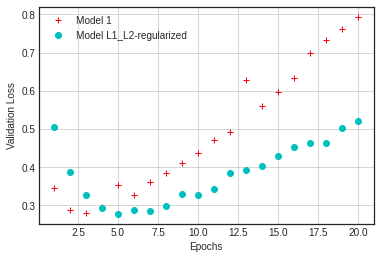

In [46]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, dropout_model_val_loss, 'co', label='Model L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()